In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

#Problema 1

In [ ]:
X1 = np.array([2, 3, 5, 7, 9])
y = np.array([5, 8, 7, 10, 12])

In [ ]:
X = np.column_stack((np.ones(len(X1)), X1))

In [ ]:
print(X)

[[1. 2.]
 [1. 3.]
 [1. 5.]
 [1. 7.]
 [1. 9.]]


In [ ]:
H = X @ np.linalg.inv(X.T @ X) @ X.T
print(H)

[[ 0.51219512  0.41463415  0.2195122   0.02439024 -0.17073171]
 [ 0.41463415  0.34756098  0.21341463  0.07926829 -0.05487805]
 [ 0.2195122   0.21341463  0.20121951  0.18902439  0.17682927]
 [ 0.02439024  0.07926829  0.18902439  0.29878049  0.40853659]
 [-0.17073171 -0.05487805  0.17682927  0.40853659  0.6402439 ]]


In [ ]:
B = np.linalg.inv(X.T @ X) @ X.T @ y
print(B)

[3.86585366 0.87195122]


In [ ]:
Y_hat = H @ y
print(Y_hat)

[ 5.6097561   6.48170732  8.22560976  9.9695122  11.71341463]


In [ ]:
error = y - Y_hat
print(error)

[-0.6097561   1.51829268 -1.22560976  0.0304878   0.28658537]


#Problema 2

In [ ]:
data = pd.read_csv('sample_data/2HAT.csv')

In [ ]:
data.head()

,Factor Coagulacion,indice pronostico,Funcion de enzima,Funcion de higado,Edad,Genero,Alcohol (moderado),Alcohol (severo),Sobrevivencia (dias)
0,6.7,62,81,2.59,50,0,1,0,695
1,5.1,59,66,1.70,39,0,0,0,403
2,7.4,57,83,2.16,55,0,0,0,710
3,6.5,73,41,2.01,48,0,0,0,349
4,7.8,65,115,4.30,45,0,0,1,2343


In [ ]:
X = data.iloc[:, :8]
Y = data.iloc[:, 8:]

In [ ]:
X.head()

,Factor Coagulacion,indice pronostico,Funcion de enzima,Funcion de higado,Edad,Genero,Alcohol (moderado),Alcohol (severo)
0,6.7,62,81,2.59,50,0,1,0
1,5.1,59,66,1.70,39,0,0,0
2,7.4,57,83,2.16,55,0,0,0
3,6.5,73,41,2.01,48,0,0,0
4,7.8,65,115,4.30,45,0,0,1


In [ ]:
Y.head()

,Sobrevivencia (dias)
0,695
1,403
2,710
3,349
4,2343


In [ ]:
scaler = MinMaxScaler()
X_scal = scaler.fit_transform(X)
Y_scal = scaler.fit_transform(Y)

In [ ]:
print("Matriz X escalada:")
print(pd.DataFrame(X_scal, columns=X.columns))

Matriz X escalada:
     Factor Coagulacion  indice pronostico  Funcion de enzima  \
0              0.476744           0.593407           0.604167   
1              0.290698           0.560440           0.447917   
2              0.558140           0.538462           0.625000   
3              0.453488           0.714286           0.187500   
4              0.604651           0.626374           0.958333   
..                  ...                ...                ...   
103            0.372093           0.681319           0.427083   
104            0.325581           0.615385           0.604167   
105            0.500000           0.901099           0.104167   
106            0.616279           0.406593           0.333333   
107            0.220930           0.659341           0.385417   

     Funcion de higado   Edad  Genero  Alcohol (moderado)  Alcohol (severo)  
0             0.326855  0.500     0.0                 1.0               0.0  
1             0.169611  0.225     0.0       

In [ ]:
X_scal = np.column_stack((np.ones(X_scal.shape[0]), X_scal))

In [ ]:
X_scal[0:5]

array([[1.        , 0.47674419, 0.59340659, 0.60416667, 0.32685512,
        0.5       , 0.        , 1.        , 0.        ],
       [1.        , 0.29069767, 0.56043956, 0.44791667, 0.16961131,
        0.225     , 0.        , 0.        , 0.        ],
       [1.        , 0.55813953, 0.53846154, 0.625     , 0.25088339,
        0.625     , 0.        , 0.        , 0.        ],
       [1.        , 0.45348837, 0.71428571, 0.1875    , 0.22438163,
        0.45      , 0.        , 0.        , 0.        ],
       [1.        , 0.60465116, 0.62637363, 0.95833333, 0.62897527,
        0.375     , 0.        , 0.        , 1.        ]])

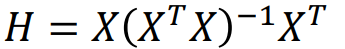

In [ ]:
H = X_scal @ np.linalg.inv(X_scal.T @ X_scal) @ X_scal.T
print(H)

[[ 0.03714196  0.01278513  0.03153001 ... -0.0107616   0.03002929
   0.00244981]
 [ 0.01278513  0.06106075  0.04827415 ...  0.02342793  0.0143413
   0.03831749]
 [ 0.03153001  0.04827415  0.09511866 ...  0.02121118  0.02055136
   0.03079561]
 ...
 [-0.0107616   0.02342793  0.02121118 ...  0.10349403  0.00417997
   0.03037262]
 [ 0.03002929  0.0143413   0.02055136 ...  0.00417997  0.06246334
  -0.00802438]
 [ 0.00244981  0.03831749  0.03079561 ...  0.03037262 -0.00802438
   0.05864247]]


In [ ]:
print(H[1])

[ 0.01278513  0.06106075  0.04827415  0.04883721 -0.00103698 -0.00988493
 -0.00850272 -0.02471719  0.00915416  0.01698394  0.00768843  0.00649882
  0.01120788  0.01324061 -0.0112086  -0.0137775  -0.00566918  0.05423731
  0.00931002 -0.01086602  0.04736964 -0.00813231  0.02221955 -0.01375323
  0.00560242 -0.02992099 -0.00581553 -0.04386713  0.02369743 -0.01763649
  0.02519157 -0.01324959 -0.00986042 -0.00705937  0.00611536  0.0139275
  0.05384792  0.00750453 -0.00799671  0.04522276  0.05294765  0.01242403
 -0.02726684  0.01508643  0.01009422 -0.01668805 -0.00459999 -0.01154267
  0.00905097 -0.00912939  0.01616169  0.01301527  0.00470791  0.03763252
  0.01913047  0.0366321   0.01377287  0.01091996 -0.01239326  0.0122687
  0.05783504  0.01834322  0.01715689 -0.02580774  0.00092851  0.03284581
  0.01511726 -0.00139408 -0.00167896  0.03155041  0.03295878  0.00787118
  0.02549958  0.04866955  0.02038499 -0.0399041  -0.01247692 -0.00342582
 -0.00124524  0.02687327 -0.01672641  0.03292217 -0.0

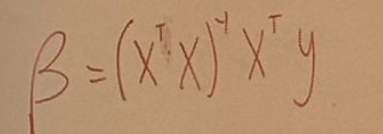


In [ ]:
B = np.linalg.inv(X_scal.T @ X_scal) @ X_scal.T @ Y_scal
print(B)

[[-0.03374218]
 [ 0.08630899]
 [ 0.20125292]
 [ 0.38437348]
 [-0.06065628]
 [-0.00613695]
 [-0.04239579]
 [ 0.07147603]]


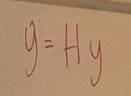


In [ ]:
Y_hat = H @ Y
print(Y_hat)

     Sobrevivencia (dias)
0              706.256237
1              430.822921
2              732.229832
3              425.039576
4             1454.587552
..                    ...
103            566.515055
104            568.334910
105            584.367939
106            385.909891
107            459.719981

[108 rows x 1 columns]


In [ ]:
Error = Y - Y_hat
print(Error)

     Sobrevivencia (dias)
0              -11.256237
1              -27.822921
2              -22.229832
3              -76.039576
4              888.412448
..                    ...
103             22.484945
104             30.665090
105             70.632061
106             -8.909891
107            182.280019

[108 rows x 1 columns]
